In [1]:
import cv2
from skimage.segmentation import slic, mark_boundaries
from skimage import exposure
import glob
import os
import os.path as osp
import matplotlib.pyplot as plt

In [2]:
img_filelist = glob.glob('coco_bgfg/*.png')

In [3]:
%%timeit

for img_f in img_filelist:
    img = cv2.imread(img_f)
    img_eq = exposure.equalize_hist(img)
    labels = slic(img_eq, n_segments=1024, sigma=0)

/home/intellif/miniconda3/envs/torch1.7/lib/python3.8/site-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


7.28 s ± 64.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
img = cv2.imread(img_filelist[0])
img_eq = exposure.equalize_hist(img)
%timeit    img_eq = exposure.equalize_hist(img)
%timeit    labels = slic(img_eq, n_segments=500, sigma=0)

38.5 ms ± 210 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
571 ms ± 3.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
print(len(img_filelist))

10


In [3]:
%%timeit
img = cv2.imread(img_filelist[0])
slic = cv2.ximgproc.createSuperpixelSLIC(img, algorithm=cv2.ximgproc.SLICO, region_size=32)
slic.iterate(10)
slic_label = slic.getLabels()

208 ms ± 5.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit
img = cv2.imread(img_filelist[0])
lsc = cv2.ximgproc.createSuperpixelLSC(img, region_size=32)
lsc.iterate(10)
lsc_label = lsc.getLabels()

663 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
%%timeit
img = cv2.imread(img_filelist[0])
height, width, channel = img.shape
seeds = cv2.ximgproc.createSuperpixelSEEDS(image_width=width, image_height=height, image_channels=channel, num_superpixels=1024, num_levels=5, prior=3, histogram_bins=10, double_step=True)
seeds.iterate(img, 10)
seeds_label = seeds.getLabels()

774 ms ± 7.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%%timeit
img = cv2.imread(img_filelist[0])
height, width, channel = img.shape
seeds = cv2.ximgproc.createSuperpixelSEEDS(image_width=width, image_height=height, image_channels=channel, num_superpixels=1024, num_levels=5, prior=3, histogram_bins=5, double_step=True)
seeds.iterate(img, 10)
seeds_label = seeds.getLabels()

191 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
plt.figure(dpi=100)
plt.imshow(slic_label)

NameError: name 'slic_label' is not defined

<Figure size 600x400 with 0 Axes>

Text(0.5, 1.0, 'lsc 468')

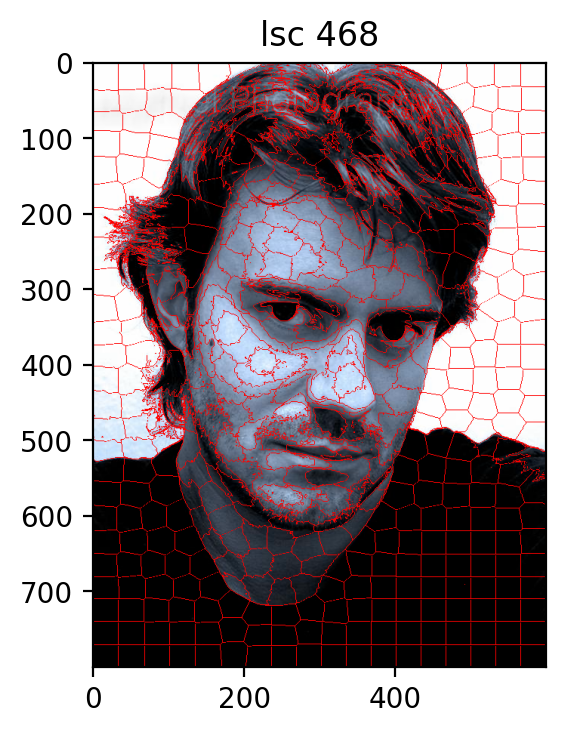

In [26]:
img = cv2.imread(img_filelist[0])
lsc = cv2.ximgproc.createSuperpixelLSC(img, region_size=32)
lsc.iterate(10)
lsc_label = lsc.getLabels()
lsc_mask = lsc.getLabelContourMask()
lsc_num = lsc.getNumberOfSuperpixels()

img[lsc_mask > 0, :] = (255, 0, 0)
plt.figure(dpi=200)
plt.imshow(img)
plt.title(f'lsc {lsc_num}')

Text(0.5, 1.0, 'seeds 450')

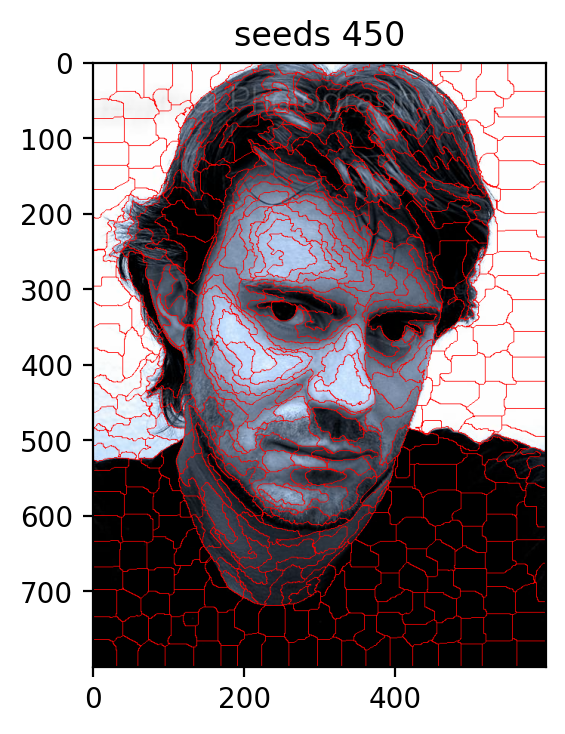

In [48]:
img = cv2.imread(img_filelist[0])
height, width, channel = img.shape
seeds = cv2.ximgproc.createSuperpixelSEEDS(image_width=width, image_height=height, image_channels=3, num_superpixels=1024, num_levels=5, prior=3, histogram_bins=15, double_step=True)
seeds.iterate(img, 10)
seeds_label = seeds.getLabels()
seeds_mask = seeds.getLabelContourMask()
seeds_num = seeds.getNumberOfSuperpixels()

img[seeds_mask > 0, :] = (255, 0, 0)
plt.figure(dpi=200)
plt.imshow(img)
plt.title(f'seeds {seeds_num}')

165 ns ± 1.11 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
345 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


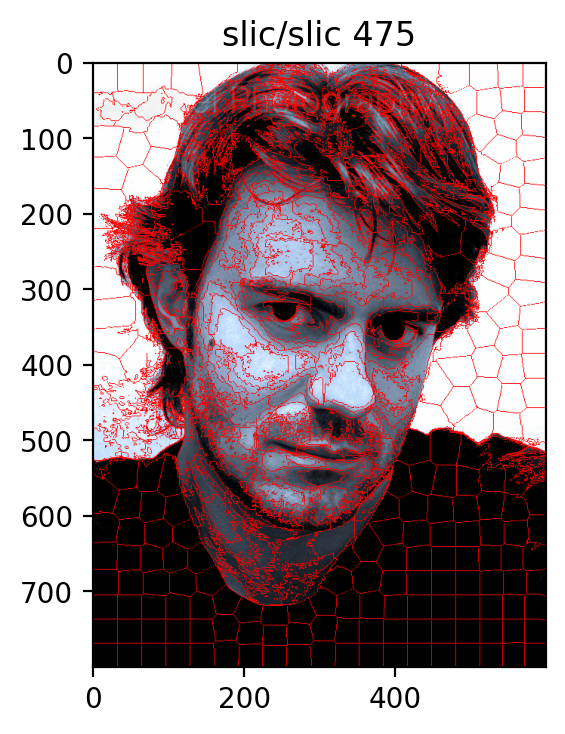

In [41]:
img = cv2.imread(img_filelist[0])
slic = cv2.ximgproc.createSuperpixelSLIC(img, algorithm=cv2.ximgproc.SLIC, region_size=32)
slic.iterate(10)
slic_label = slic.getLabels()
slic_mask = slic.getLabelContourMask()
slic_num = slic.getNumberOfSuperpixels()

img[slic_mask > 0, :] = (255,0, 0) 
plt.figure(dpi=200)
plt.imshow(img)
plt.title(f'slic/slic {slic_num}')

%timeit slic.getNumberOfSuperpixels()
%timeit slic_label.max()

In [23]:
%%timeit 

img = cv2.imread(img_filelist[0])
slic = cv2.ximgproc.createSuperpixelSLIC(img, algorithm=cv2.ximgproc.SLIC, region_size=32)
slic.iterate(10)
slic_label = slic.getLabels()

172 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Text(0.5, 1.0, 'scikit/slic 418')

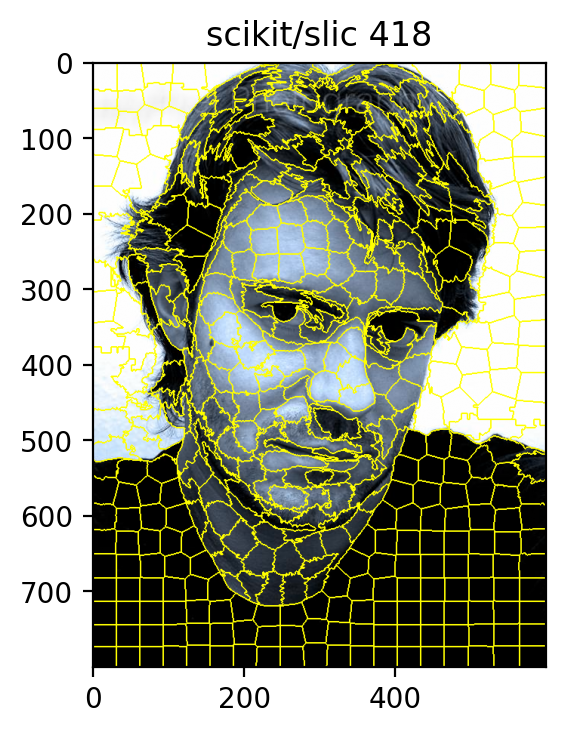

In [37]:
from skimage.segmentation import slic, mark_boundaries
import numpy as np

img = cv2.imread(img_filelist[0])
img_eq = exposure.equalize_hist(img)
segments_slic = slic(img_eq, n_segments=500, sigma=0)
mask = mark_boundaries(img, segments_slic)
num_slic = len(np.unique(segments_slic))

plt.figure(dpi=200)
plt.imshow(mask)
plt.title(f'scikit/slic {num_slic}')

In [36]:
from math import sqrt
print(img.shape)
sqrt(800*600/500)

(800, 600, 3)


30.983866769659336

In [42]:
%timeit len(np.unique(slic_label))

7.68 ms ± 183 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
